<a href="https://colab.research.google.com/github/phamhuyen286/practice/blob/master/Predicting_Stock_Price_ver01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt

# List of stock CSV files
files = ["ACB.csv", "VCB.csv", "VIB.csv", "FPT.csv", "FRT.csv",
         "PNJ.csv", "HPG.csv", "MBB.csv", "MWG.csv"]

In [2]:
ACB = pd.read_csv("ACB.csv")
VCB = pd.read_csv("VCB.csv")
VIB = pd.read_csv("VIB.csv")
FPT = pd.read_csv("FPT.csv")
FRT = pd.read_csv("FRT.csv")
PNJ = pd.read_csv("PNJ.csv")
HPG = pd.read_csv("HPG.csv")
MBB = pd.read_csv("MBB.csv")
MWG = pd.read_csv("MWG.csv")

In [3]:
ACB.head() #to check features what we

,time,open,high,low,close,volume,ticker
0,2006-11-21,4436,5545,4399,4813,56500,ACB
1,2006-11-22,5294,5294,4806,4980,62300,ACB
2,2006-11-23,5360,5360,4806,5116,69900,ACB
3,2006-11-24,5176,5619,5176,5427,63600,ACB
4,2006-11-27,5427,5967,4991,5427,42400,ACB


In [6]:
# Function to preprocess each stock's data
def preprocess_data(file):
    df = pd.read_csv(file)
    df['time'] = pd.to_datetime(df['time'])  # Ensure consistent datetime format
    df.sort_values('time', inplace=True)
    df.set_index('time', inplace=True)

    # Features and target
    df['Target'] = df['close'].shift(-1)  # Predict next day's close price
    df.dropna(inplace=True)  # Remove NaN rows
    features = ['open', 'high', 'low', 'volume', 'close']  # Input features
    return df[features + ['Target']]

In [10]:
# Function to train a model for one stock
def train_stock_model(data, stock_name):
    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Split into features and target
    X = scaled_data[:, :-1]  # All columns except Target
    y = scaled_data[:, -1]   # Target column

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape for LSTM input
    X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    # Build and train the LSTM model
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_lstm, y_train, epochs=10, batch_size=16, verbose=0)

    # Predict and evaluate
    predicted = model.predict(X_test_lstm)
    predicted = scaler.inverse_transform(np.concatenate((X_test, predicted), axis=1))[:, -1]
    y_test_actual = scaler.inverse_transform(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
    print(f"{stock_name}: RMSE = {rmse}")

    # Save the model
    model.save(os.path.join(data_path, f"{stock_name}_lstm_model.h5"))

    return predicted, y_test_actual, rmse

Processing ACB...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


ACB: RMSE = 259.0131541428465
Processing VCB...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


VCB: RMSE = 888.0152770760477
Processing VIB...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


VIB: RMSE = 383.99871568127185
Processing FPT...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


FPT: RMSE = 611.5948319886761
Processing FRT...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


FRT: RMSE = 1761.138960033886
Processing PNJ...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


PNJ: RMSE = 1038.0425011772559
Processing HPG...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


HPG: RMSE = 361.4536541691201
Processing MBB...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


MBB: RMSE = 296.44582722472927
Processing MWG...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


MWG: RMSE = 829.9989767301697


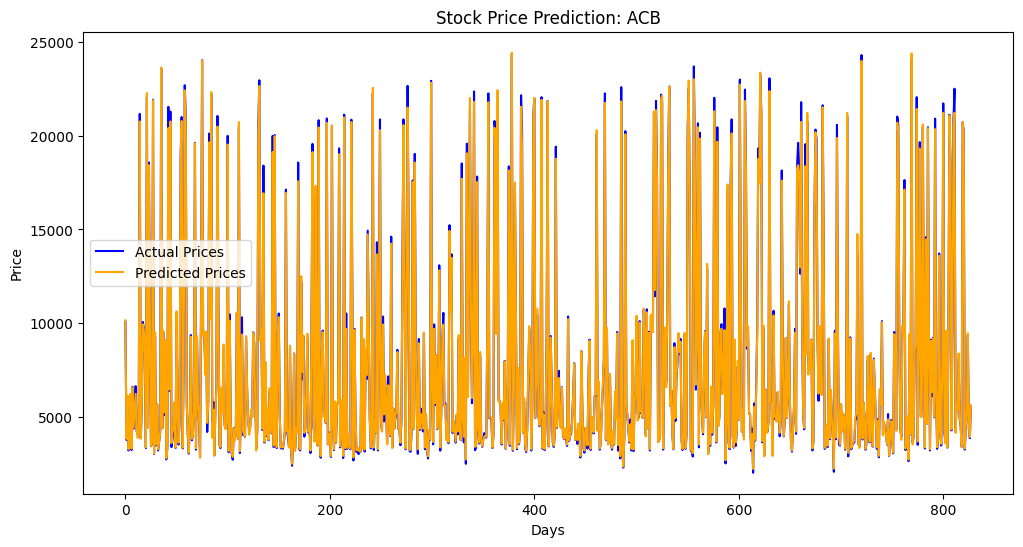

In [12]:
# Process and train models for all stocks
data_path = "/content/Stock_data"
results = {}  # To store results for all stocks
for file in files:
    stock_name = os.path.splitext(os.path.basename(file))[0]
    print(f"Processing {stock_name}...")
    stock_data = preprocess_data(file)
    predictions, actuals, rmse = train_stock_model(stock_data, stock_name)
    results[stock_name] = {'predictions': predictions, 'actuals': actuals, 'rmse': rmse}

# Visualize results for one stock as an example
stock_to_visualize = "ACB"  # Change to another stock name if needed
if stock_to_visualize in results:
    plt.figure(figsize=(12, 6))
    plt.plot(results[stock_to_visualize]['actuals'], label='Actual Prices', color='blue')
    plt.plot(results[stock_to_visualize]['predictions'], label='Predicted Prices', color='orange')
    plt.title(f'Stock Price Prediction: {stock_to_visualize}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
else:
    print(f"Stock {stock_to_visualize} not found in the results.")

Save model for chatbot integration

In [20]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [22]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import mse # Import mse from keras.losses

# Directory containing .h5 files
directory_path = "/content/Stock_data"

# Dictionary to store models
models = {}

# Load all .h5 files from the directory
for file in os.listdir(directory_path):
    if file.endswith(".h5"):  # Check if the file is a .h5 file
        file_path = os.path.join(directory_path, file)
        model_name = file.split(".")[0]  # Use the file name (without extension) as the key
        models[model_name] = load_model(file_path, custom_objects={'mse': mse}) # Explicitly pass 'mse' to custom_objects

# Access models
for model_name, model in models.items():
    print(f"Loaded model: {model_name}")

Loaded model: FPT_lstm_model
Loaded model: PNJ_lstm_model
Loaded model: MWG_lstm_model
Loaded model: VCB_lstm_model
Loaded model: MBB_lstm_model
Loaded model: VIB_lstm_model
Loaded model: HPG_lstm_model
Loaded model: FRT_lstm_model
Loaded model: ACB_lstm_model


In [28]:
# Step 2: Define prediction function
def chatbot_recommendation(model_name, user_input):
    """
    Generate a chatbot recommendation using the selected model.
    """
    model = models.get(model_name)
    if not model:
        return "Selected model is not available."

    # Example: Convert user input to a numerical format (modify as per your model requirements)
    # For simplicity, let's assume your models accept padded sequences or numerical inputs
    # Replace this part with your model's specific input preprocessing
    processed_input = np.random.rand(1, 10)  # Placeholder: replace with actual preprocessing
    prediction = model.predict(processed_input)

    # Process the output as needed
    recommendation = f"Model '{model_name}' recommends: {np.argmax(prediction, axis=1)[0]}"
    return recommendation

# Step 3: Gradio interface
import gradio as gr # Import the gradio library as 'gr'
model_names = list(models.keys())

interface = gr.Interface(
    fn=chatbot_recommendation,
    inputs=[
        gr.Dropdown(choices=model_names, label="Select Model"),
        gr.Textbox(lines=2, placeholder="Enter your query here", label="User Input"),
    ],
    outputs=gr.Textbox(label="Recommendation"),
    title="Chatbot Recommendation System",
    description="Select a model and get recommendations based on your input."
)

# Step 4: Launch the app
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2d954c79174a8914fb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
